In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
df = pd.read_csv('SongLyrics.csv')

In [65]:
df.columns

Index(['Unnamed: 0', 'Lyrics', 'Songs_link', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1',
       'Unnamed: 0.1.1.1.1.1.1', 'Unnamed: 0.1.1.1.1.1.1.1'],
      dtype='object')

In [66]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1',
       'Unnamed: 0.1.1.1.1.1.1', 'Unnamed: 0.1.1.1.1.1.1.1'], axis=1, inplace = True)

In [67]:
df.dropna(inplace=True)

In [68]:
df.head()

,Lyrics,Songs_link
1,\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r...,http://azlyrics.com/lyrics/aerosmith/stopmessi...
3,\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r...,http://azlyrics.com/lyrics/aerosmith/streetjes...
5,\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r...,http://azlyrics.com/lyrics/aerosmith/sudonasun...
7,\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r...,http://azlyrics.com/lyrics/aerosmith/sunnyside...
9,\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r...,http://azlyrics.com/lyrics/aerosmith/sunshine....


In [69]:
songs = pd.read_csv('Final_Song_List.csv')

In [70]:
songs.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Artist_list', 'Songs_list'], dtype='object')

In [71]:
songs.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [72]:
def full_link(link):
    return "http://azlyrics.com" + link[2:]

In [73]:
songs['Songs_link'] = songs['Songs_list'].apply(full_link)

In [74]:
songs.drop('Songs_list', axis=1, inplace=True)

In [75]:
songs.head()

,Artist_list,Songs_link
0,https://www.azlyrics.com/19/2pac.html,http://azlyrics.com/lyrics/2pac/16ondeathrow.html
1,https://www.azlyrics.com/19/2pac.html,http://azlyrics.com/lyrics/2pac/2ofamerikazmos...
2,https://www.azlyrics.com/19/2pac.html,http://azlyrics.com/lyrics/2pac/2ofamerikazmos...
3,https://www.azlyrics.com/19/2pac.html,http://azlyrics.com/lyrics/2pac/5deadlyvenomz....
4,https://www.azlyrics.com/19/2pac.html,http://azlyrics.com/lyrics/2pac/acrookedniggat...


In [76]:
final_df = pd.merge(df, songs, on="Songs_link")

In [77]:
def remove_extra_characters(string):
    string = string.replace("\r", "")
    string = string.replace("\n", " ")
    string = string.replace("\'", "")
    string = string.replace(".", "")
    return string

In [78]:
final_df['Lyrics'] = final_df['Lyrics'].apply(remove_extra_characters)

In [79]:
final_df['Occurences'] = final_df.groupby('Artist_list')['Lyrics'].transform('count')

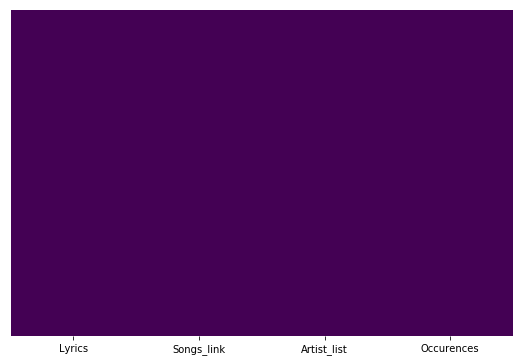

In [80]:
plt.figure(figsize=(9,6))
sns.heatmap(final_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Hence, there are no null values in the final dataframe.

In [82]:
final_df.drop_duplicates(['Songs_link'], keep='first', inplace=True)

In [83]:
final_df.describe()

,Occurences
count,23318.000000
mean,307.591303
std,173.129379
min,32.000000
25%,182.000000
50%,279.000000
75%,405.000000
max,783.000000


In [84]:
def number_of_words(string):
    array = string.split(" ")
    return len(array)

In [85]:
final_df['Length of lyrics'] = final_df['Lyrics'].apply(number_of_words)

In [86]:
final_df.describe()

,Occurences,Length of lyrics
count,23318.000000,23318.000000
mean,307.591303,276.972339
std,173.129379,174.140975
min,32.000000,4.000000
25%,182.000000,168.000000
50%,279.000000,233.000000
75%,405.000000,329.000000
max,783.000000,3717.000000


In [87]:
final_df.head()

,Lyrics,Songs_link,Artist_list,Occurences,Length of lyrics
0,"Baby, please stop messin round Youll be mess...",http://azlyrics.com/lyrics/aerosmith/stopmessi...,https://www.azlyrics.com/a/aerosmith.html,215,136
1,Hey have you heard the news? Somebody stole ...,http://azlyrics.com/lyrics/aerosmith/streetjes...,https://www.azlyrics.com/a/aerosmith.html,215,483
2,I was a city boy Cought up in a city way A n...,http://azlyrics.com/lyrics/aerosmith/sudonasun...,https://www.azlyrics.com/a/aerosmith.html,215,188
3,You hear them people talkin About the man ab...,http://azlyrics.com/lyrics/aerosmith/sunnyside...,https://www.azlyrics.com/a/aerosmith.html,215,304
4,i sold my soul for a one night stand I follo...,http://azlyrics.com/lyrics/aerosmith/sunshine....,https://www.azlyrics.com/a/aerosmith.html,215,220


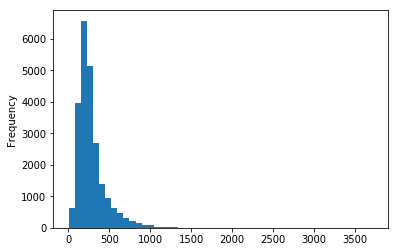

In [88]:
final_df['Length of lyrics'].plot(bins=50, kind='hist')

In [89]:
final_df[final_df['Length of lyrics'] == 3717]['Artist_list']

9530    https://www.azlyrics.com/e/eminem.html
Name: Artist_list, dtype: object

Hence, Emiem has the longest song in the given dataset.

# Text Pre-Processing

In [90]:
import string

In [91]:
def text_process(lyrics):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in lyrics if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    return nopunc.split()

In [92]:
final_df['Lyrics'].head(5).apply(text_process)

0    [Baby, please, stop, messin, round, Youll, be,...
1    [Hey, have, you, heard, the, news, Somebody, s...
2    [I, was, a, city, boy, Cought, up, in, a, city...
3    [You, hear, them, people, talkin, About, the, ...
4    [i, sold, my, soul, for, a, one, night, stand,...
Name: Lyrics, dtype: object

Hence, the messages have been tokenised. Tokenisation is the term used to describe the process of converting